In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

# Linear Discriminant for $p = 1$, Examples

In [61]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = [0 , 0.5]
std = 0.1
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.normal(loc = means[k] , scale = std , size = N)
    for i in range(N):
        df.loc[len(df)] = [X[i] , 0 , k]

df

,X,Y,Class
0,-0.026101,0.0,0.0
1,-0.060961,0.0,0.0
2,0.134717,0.0,0.0
3,0.179189,0.0,0.0
4,0.092666,0.0,0.0
...,...,...,...
195,0.407687,0.0,1.0
196,0.407416,0.0,1.0
197,0.432184,0.0,1.0
198,0.563912,0.0,1.0


<Axes: xlabel='X', ylabel='Count'>

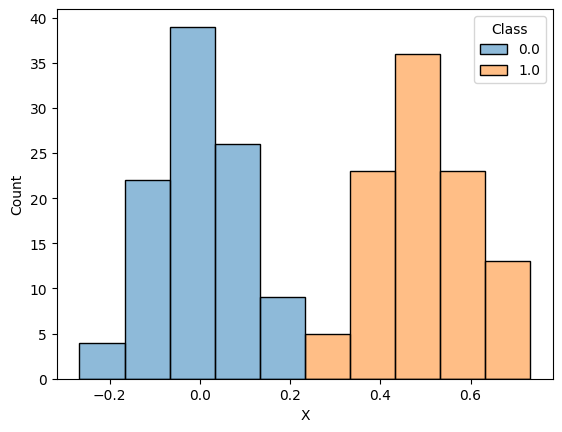

In [62]:
sns.histplot(data = df , x='X' , hue = "Class" , bins=10)

<Axes: xlabel='X', ylabel='Y'>

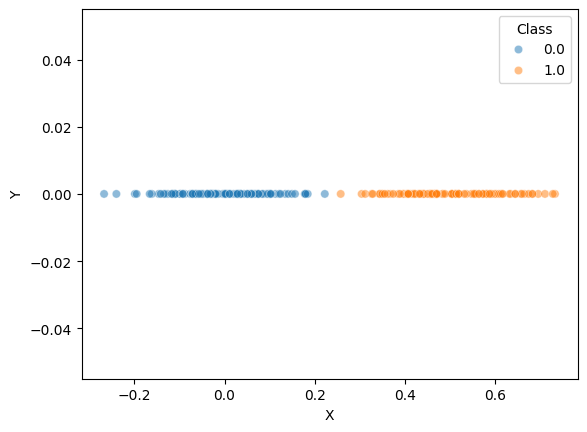

In [63]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

- 2 Classes are generated with the same standard deviation but different mean.

In [64]:
PI = math.pi
sigma = std

def f(k , x): # The LDA equation for p = 1
    return (1 / math.sqrt(2 * PI * sigma * sigma)) * math.exp(-(1/(2 * sigma * sigma)) * (x - means[k]) ** 2)

- With the $f_k(x)$ function above, we can calculate the probability that $x$ falls into class $k$.

In [65]:
x = 0

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 99.99962733607158%
Probability that x would fall in class 1 = 0.0003726639284186568%


- For the result above, it's too obvious that $x = 0$ will falls into the first class.
- Lets make another example but less obvious.

In [66]:
x = 0.27

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 26.894142136999495%
Probability that x would fall in class 1 = 73.1058578630005%


- Here, we see that the point $x = 0.27$ is somewhere in the middle of 2 classes. The LDA model predicts that $x$ fits best for the second class as the probability ~ 73.1%.
- Instead of calculating the whole equation, Let's only calculate the dicriminant function of LDA.

In [67]:
EPS = 0.00001

def discriminant(x):
    result_class = -1
    result_evaluation = 0
    for k in range(K):
        evaluation = 0

        evaluation += x * means[k] / sigma ** 2
        evaluation -= means[k] ** 2 / (2 * sigma ** 2)
        evaluation += math.log(pi[k])

        if result_class == -1 or evaluation > result_evaluation:
            result_evaluation = evaluation
            result_class = k

        print(f"Class {k} has the evaluation of {evaluation}")

    print(f"Best class fits for x = {x} is class {result_class} with the maximum evaluation of {result_evaluation} amongst all")

x = 0
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of -13.193147180559944
Best class fits for x = 0 is class 0 with the maximum evaluation of -0.6931471805599453 amongst all


In [68]:
x = 0.27
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of 0.3068528194400547
Best class fits for x = 0.27 is class 1 with the maximum evaluation of 0.3068528194400547 amongst all


- Based on the generated data, we can see that the decision boundary for 2 classes is $x = \frac{0 + 0.5}{2} = 0.25$, since $\mu_1 = 0 , \mu_2 = 0.5$

In [69]:
x = (means[0] + means[1])/2 + (math.log(pi[0]) - math.log(pi[1])) * ((std**2)/(means[0] - means[1]))

print('The boundary decision: x =' , x)

The boundary decision: x = 0.25


In [70]:
x = 0.25
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of -0.6931471805599453
Best class fits for x = 0.25 is class 0 with the maximum evaluation of -0.6931471805599453 amongst all


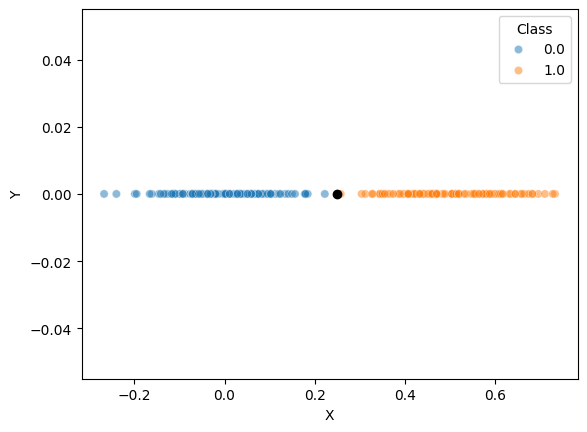

In [71]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)
plt.scatter(x=0.25 , y = 0 , color = 'black')

- For illustration, the black dot on the graph is the Bayes boundary decision.

# Linear Discriminant for $p > 1$, example:

In [72]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = np.array([np.array([-0.5 , -0.5]) , np.array([0.5 , 0.5])])
std = np.array([[0.1 , 0.5] , [0.5 , 0.1]])
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
    for i in range(N):
        df.loc[len(df)] = [X[i][0] , X[i][1] , k]

df

C:\Users\vumin\AppData\Local\Temp\ipykernel_6808\639775262.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
C:\Users\vumin\AppData\Local\Temp\ipykernel_6808\639775262.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)


,X,Y,Class
0,-1.810717,1.080374,0.0
1,0.108555,-0.164666,0.0
2,0.232332,-0.019514,0.0
3,-1.552275,-1.295465,0.0
4,-0.085605,-0.288390,0.0
...,...,...,...
195,-0.177844,-0.365850,1.0
196,-0.326328,0.639629,1.0
197,1.447911,1.630751,1.0
198,1.105419,0.673775,1.0


<Axes: xlabel='X', ylabel='Y'>

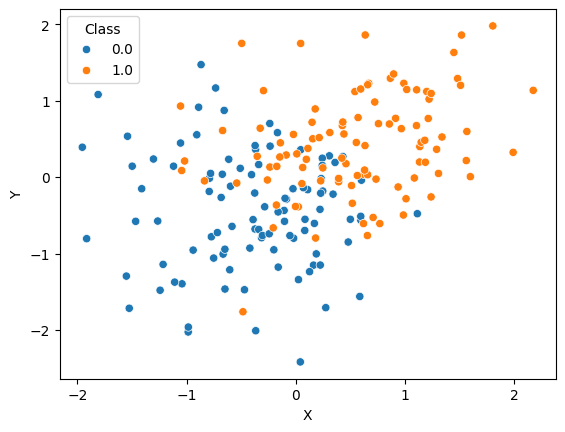

In [73]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

In [74]:
PI = math.pi

def f(k , x):
    det = abs(np.linalg.det(std))
    denominator = (2 * PI) ** (2 / 2) * det ** (1/2)
    mat = x - means[k]
    exponent = mat @ np.linalg.inv(std) @ mat.T
    exponent *= -1/2
    return 1/denominator * math.exp(exponent)

X = [1 , 1]

total = 0
for k in range(K):
    total += f(k , X)

for k in range(K):
    prob = f(k , X) / total
    print(f"The probability of X falling in class {k} is {prob*100:.3f}% ")




The probability of X falling in class 0 is 3.445% 
The probability of X falling in class 1 is 96.555% 


-1.6666666666666667 -1.6666666666666667
-1.6666666666666667 * x + -1.6666666666666667 * y = C


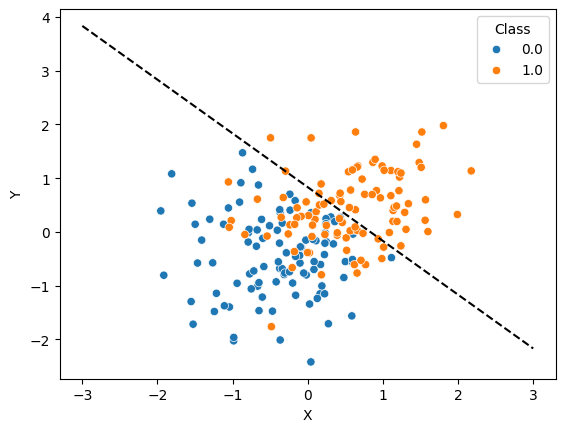

In [75]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

def decision_boundary():
    std_inv = np.linalg.inv(std)
    exponent = means[0].transpose() @ std_inv - means[1].transpose() @ std_inv
    print(exponent[0] , exponent[1])
    C = 1/2 * means[0].transpose() @ std_inv @ means[0] - 1/2 * means[1].transpose() @ std_inv @ means[1] + math.log(pi[0]) + math.log(pi[1])

    print(f"{exponent[0]} * x + {exponent[1]} * y = C")
    # y = (-exponent[0] * x + c ) / exponent[1]

    X = np.linspace(-3 , 3 , 100)
    Y = [((-exponent[0] * X[i] + C ) / exponent[1]) for i in range(100)]
    
    plt.plot(X , Y , c='black' , linestyle='dashed')

decision_boundary()

In [76]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = np.array([np.array([-1 , -1]) , np.array([1 , 1])])
std = np.array([[0.1 , 0.5] , [0.5 , 0.1]])
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
    for i in range(N):
        df.loc[len(df)] = [X[i][0] , X[i][1] , k]

df

C:\Users\vumin\AppData\Local\Temp\ipykernel_6808\1960592763.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)
C:\Users\vumin\AppData\Local\Temp\ipykernel_6808\1960592763.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean=means[k] , cov=std , size = 100)


,X,Y,Class
0,-1.256741,-0.304531,0.0
1,-1.201164,-1.229294,0.0
2,-0.555498,-1.181040,0.0
3,-2.882020,-0.951981,0.0
4,-1.768014,0.112908,0.0
...,...,...,...
195,1.247402,0.021917,1.0
196,1.037413,1.846726,1.0
197,0.914548,0.233886,1.0
198,0.349806,-0.750912,1.0


-3.3333333333333335 -3.3333333333333335
-3.3333333333333335 * x + -3.3333333333333335 * y = C
(np.float64(-3.349878895387401), np.float64(2.9324503264279))


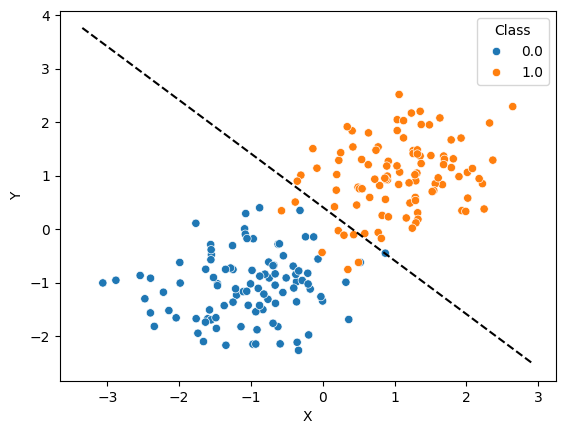

In [77]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

def decision_boundary():
    std_inv = np.linalg.inv(std)
    exponent = means[0].transpose() @ std_inv - means[1].transpose() @ std_inv
    print(exponent[0] , exponent[1])
    C = 1/2 * means[0].transpose() @ std_inv @ means[0] - 1/2 * means[1].transpose() @ std_inv @ means[1] + math.log(pi[0]) + math.log(pi[1])

    print(f"{exponent[0]} * x + {exponent[1]} * y = C")
    # y = (-exponent[0] * x + c ) / exponent[1]

    lims = plt.xlim()
    print(lims)
    X = np.linspace(lims[0] , lims[1] , 100)
    Y = [((-exponent[0] * X[i] + C ) / exponent[1]) for i in range(100)]
    
    plt.plot(X , Y , c='black' , linestyle='dashed')

decision_boundary()

-3.3333333333333335 -3.3333333333333335
-3.3333333333333335 * x + -3.3333333333333335 * y = C
(np.float64(-3.349878895387401), np.float64(2.9324503264279))


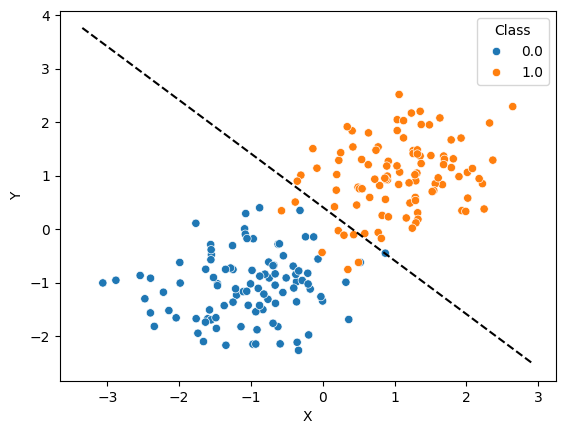

In [78]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

def decision_boundary():
    std_inv = np.linalg.inv(std)
    exponent = means[0].transpose() @ std_inv - means[1].transpose() @ std_inv
    print(exponent[0] , exponent[1])
    C = 1/2 * means[0].transpose() @ std_inv @ means[0] - 1/2 * means[1].transpose() @ std_inv @ means[1] + math.log(pi[0]) + math.log(pi[1])

    print(f"{exponent[0]} * x + {exponent[1]} * y = C")
    # y = (-exponent[0] * x + c ) / exponent[1]

    lims = plt.xlim()
    print(lims)
    X = np.linspace(lims[0] , lims[1] , 100)
    Y = [((-exponent[0] * X[i] + C ) / exponent[1]) for i in range(100)]
    
    plt.plot(X , Y , c='black' , linestyle='dashed')

decision_boundary()

-3.3333333333333335 -3.3333333333333335
-3.3333333333333335 * x + -3.3333333333333335 * y = C
(np.float64(-3.349878895387401), np.float64(2.9324503264279))
-3.349878895387401 3.7657672037233683
-3.349878895387401 3.702309332795941
-3.349878895387401 3.6388514618685135
-3.349878895387401 3.5753935909410863
-3.349878895387401 3.511935720013659
-3.349878895387401 3.448477849086232
-3.349878895387401 3.3850199781588044
-3.349878895387401 3.321562107231377
-3.349878895387401 3.25810423630395
-3.349878895387401 3.1946463653765225
-3.349878895387401 3.1311884944490953
-3.349878895387401 3.067730623521668
-3.349878895387401 3.0042727525942405
-3.349878895387401 2.9408148816668134
-3.349878895387401 2.877357010739386
-3.349878895387401 2.8138991398119586
-3.349878895387401 2.750441268884532
-3.349878895387401 2.6869833979571043
-3.349878895387401 2.623525527029677
-3.349878895387401 2.56006765610225
-3.349878895387401 2.496609785174822
-3.349878895387401 2.433151914247395
-3.349878895387401 2.3

C:\Users\vumin\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\vumin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


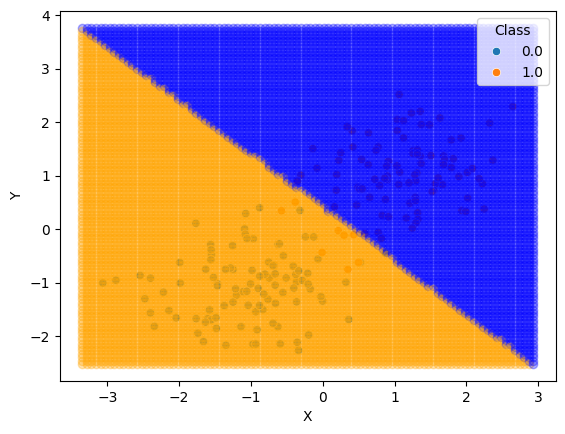

In [90]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class')

def decision_boundary():
    std_inv = np.linalg.inv(std)
    exponent = means[0].transpose() @ std_inv - means[1].transpose() @ std_inv
    print(exponent[0] , exponent[1])
    C = 1/2 * means[0].transpose() @ std_inv @ means[0] - 1/2 * means[1].transpose() @ std_inv @ means[1] + math.log(pi[0]) + math.log(pi[1])

    print(f"{exponent[0]} * x + {exponent[1]} * y = C")
    # y = (-exponent[0] * x + c ) / exponent[1]

    lims = plt.xlim()
    print(lims)
    X = np.linspace(lims[0] , lims[1] , 100)
    Y = [((-exponent[0] * X[i] + C ) / exponent[1]) for i in range(100)]

    ylims = plt.ylim()
    plotY = np.linspace(ylims[0] , ylims[1] , 100)
    for x in X:
        for y in Y:
            print(x , y)
            eval = exponent[0] * x + exponent[1] * y - C
            color = 'orange'
            if eval < 0:
                color = 'blue';
            plt.plot(x , y , c=color , marker='o' , alpha=0.3)
    
    # plt.plot(X , Y , c='black' , linestyle='dashed')

decision_boundary()